In [37]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt   #Data visualisation libraries 
import sklearn
from sklearn.model_selection import cross_val_score
# Sci-kit Learn Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
# Metrics
from sklearn.metrics import mean_squared_error
from pprint import pprint
import copy
from sklearn.model_selection import ParameterGrid

In [38]:
loan_df = pd.read_csv('D:\Academic\Data Science\lc_data/cleaned_data.csv')
loan_df.head(5)
test_df = pd.read_csv('D:\Academic\Data Science\lc_data/AnalysisTestCaseData.csv')
test_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,application_type,annual_inc_joint,dti_joint,tot_coll_amt
0,1068967,1303403,4500,4500,4500,1,6.03,136.96,1,1,...,4930.30217,4500.0,430.30,0,0.0,138.95,1,0,0,0
1,1068350,1302971,3500,3500,3500,1,6.03,106.53,1,1,...,3834.66085,3500.0,334.66,0,0.0,107.86,1,0,0,0
2,1067919,1302295,6375,6375,6375,1,7.51,198.34,1,3,...,6737.55000,6375.0,362.55,0,0.0,2585.54,1,0,0,0
3,1067109,1301487,8500,8500,8500,1,6.03,258.71,1,1,...,9074.73000,8500.0,574.73,0,0.0,4936.27,1,0,0,0
4,1066084,1300233,5000,5000,5000,1,6.03,152.18,1,1,...,5410.75000,5000.0,410.75,0,0.0,2065.02,1,0,0,0


In [39]:
# Labels (y_true of this dataset)
y = loan_df.pop("int_rate")
z = test_df.pop("int_rate")

In [40]:
train = int(len(loan_df) * 0.60)
val = int(len(loan_df) * 0.20)
test = int(len(loan_df) * 0.20)
case = int(len(test_df))

In [41]:
def cross_validate(clf, df, test_x, test_y, k = 5) :
  # Build the metric dict.
  metric = {"train":{"mse": [], "score": []},
            "val" : {"mse": [], "score": []},
            "test" :{"mse": [], "score": []}};

  split = int(len(df) * 0.80)
  for i in range(k) :
    df = df.sample(frac=1)
    y = df["label"]
    x = df.loc[:, df.columns != 'label']
    train_x, train_y = x[:split],y[:split]
    val_x, val_y = x[split:], y[split:]
    model = copy.deepcopy(clf)
    model.fit(train_x, train_y)  
    # Log the Mean Square Error
    metric["train"]["mse"].append(mean_squared_error(train_y,model.predict(train_x)))
    metric["val"]["mse"].append(mean_squared_error(val_y,model.predict(val_x)))
    metric['test']["mse"].append(mean_squared_error(test_y,model.predict(test_x))) 
    # Log the Model Score
    metric["train"]["score"].append(model.score(train_x,train_y))
    metric["val"]["score"].append(model.score(val_x,val_y))
    metric["test"]["score"].append(model.score(test_x,test_y))    
  return metric
  

In [42]:
crossValidationSet = copy.deepcopy(loan_df[:train+val]);
crossValidationSet["label"] = y[:train+val];

In [43]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
train_x,train_y = loan_df[:train], y[:train]
val_x, val_y = loan_df[train: train + val], y[train: train + val]
test_x, test_y = loan_df[train + test :], y[train + test :]
case_x, case_y = test_df[:case], y[:case]

assert len(train_x) == train, "Training set length does not match expected train length"
assert len(val_x) == val, "Validation set length does not match expected validation length"
assert len(test_x) >= test , "Test set length does not match expected test length"

In [45]:
lr = LinearRegression() # Init
lr_case = LinearRegression()
l1 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
l2 = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)
lr.fit(train_x, train_y) # Train
lr_case.fit(case_x, case_y) # Case

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Linear Regression Score and MSE

1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [46]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MSE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Linear Regression:", mean_squared_error(train_y, lr.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Linear Regression:", mean_squared_error(val_y, lr.predict(val_x)))

# MSE on test set
print("Test Set MSE Linear Regression:", mean_squared_error(test_y, lr.predict(test_x)))

print("********************MAPE********************")
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MAPE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MAPE on training set
print("Training Set MAPE Linear Regression:", mape(train_y, lr.predict(train_x)))

# MAPE on validation set
print("Validation Set MAPE Linear Regression:", mape(val_y, lr.predict(val_x)))

# MAPE on test set
print("Test Set MAPE Linear Regression:", mape(test_y, lr.predict(test_x)))

print("********************Metrics for Case Data********************")
# R2 on case set
print("R2 Score Linear Regression:", lr_case.score(case_x, case_y ))
# MAPE on case set
print("Case Set MAPE Linear Regression:", mape(case_y, lr_case.predict(case_x)))

********************MSE********************
Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MSE Linear Regression: 0.7588524105425732
Validation Set MSE Linear Regression: 0.30090928582755705
Test Set MSE Linear Regression: 0.24695311566090825
********************MAPE********************
Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MAPE Linear Regression: 4.992220117102113
Validation Set MAPE Linear Regression: 4.130548073703696
Test Set MAPE Linear Regression: 3.564994794289469
********************Metrics for Case Data********************
R2 Score Linear Regression: 0.6229399217587759
Case Set MAPE Linear Regression: 17.839923698310233


# 5 Fold Cross Validation

In [47]:
lr_cv = LinearRegression()
cv_result = cross_validate(lr_cv, crossValidationSet, test_x, test_y)
pprint(cv_result)

{'test': {'mse': [0.1703380733501605,
                  0.1699350997549044,
                  0.17079617465185265,
                  0.17027254504494188,
                  0.16998594455895355],
          'score': [0.9910962093689558,
                    0.9911172733181448,
                    0.9910722638235012,
                    0.9910996346179245,
                    0.9911146155947068]},
 'train': {'mse': [0.6232439881174426,
                   0.6198033163357533,
                   0.6217737081632708,
                   0.6214534285421622,
                   0.621056109592808],
           'score': [0.967511578849207,
                     0.9676848117041561,
                     0.9675716259642054,
                     0.9675746049545096,
                     0.9675953076083069]},
 'val': {'mse': [0.6133578754105337,
                 0.627148052925956,
                 0.6193116026256982,
                 0.6205576882986947,
                 0.622094454969878],
         'score': [

In [48]:
lr_predictions = lr.predict(test_x)
lr_case_pred = lr_case.predict(case_x)

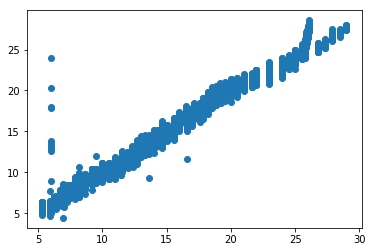

In [49]:
plt.scatter(test_y,lr_predictions)

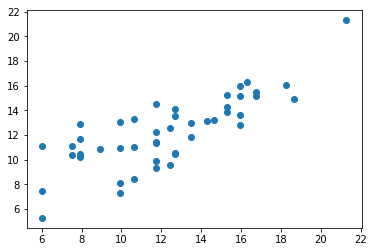

In [50]:
plt.scatter(case_y,lr_case_pred)

# Grid Search for Hyperparameter Tuning

In [51]:
# Linear Regression Params
fit_intercept : bool
normalize : bool
params = {"fit_intercept":[True, False], "normalize" : [True, False]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  result.append(cross_validate(LinearRegression(param),crossValidationSet, test_x, test_y))
  

In [52]:
print("Result of" , grid[0] , "hyper parameters is")
pprint(result[0])

Result of {'fit_intercept': True, 'normalize': True} hyper parameters is
{'test': {'mse': [0.1698449597669441,
                  0.16939704068340694,
                  0.17139814698497804,
                  0.17047020501849816,
                  0.17028343667255288],
          'score': [0.9911219850514907,
                    0.9911453983592793,
                    0.9910407979538078,
                    0.9910893026763563,
                    0.9910990652985117]},
 'train': {'mse': [0.6235737301510373,
                   0.622614412517702,
                   0.6217075284391466,
                   0.6220074404021696,
                   0.6214018056462144],
           'score': [0.9674845071167282,
                     0.9675418086357536,
                     0.9675446491203047,
                     0.9675439117046343,
                     0.9675705916786745]},
 'val': {'mse': [0.6120506026917109,
                 0.615866183478882,
                 0.6266297946751244,
                 0


# Random Forest

In [53]:
rf = RandomForestRegressor() # Init
rf.fit(train_x, train_y) # Train
rf_case = RandomForestRegressor() 
rf_case.fit(case_x, case_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Random Forest Regressor Score and MSE
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [54]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Random Forest  :", rf.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Random Forest  :", rf.score(val_x, val_y))

# MSE on test set
print("Test Set Score Random Forest  :", rf.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Random Forest :", mean_squared_error(train_y, rf.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Random Forest :", mean_squared_error(val_y, rf.predict(val_x)))

# MSE on test set
print("Test Set MSE Random Forest :", mean_squared_error(test_y, rf.predict(test_x)))

print("********************MAPE********************")
# MAPE on training set
print("Training Set Score Random Forest  :", rf.score(train_x,train_y))

# MAPE on validation set
print("Validation Set Score Random Forest  :", rf.score(val_x, val_y))

# MAPE on test set
print("Test Set Score Random Forest  :", rf.score(test_x, test_y))

# MAPE on training set
print("Training Set MAPE Random Forest :", mape(train_y, rf.predict(train_x)))

# MAPE on validation set
print("Validation Set MAPE Random Forest :", mape(val_y, rf.predict(val_x)))

# MAPE on test set
print("Test Set MAPE Random Forest :", mape(test_y, rf.predict(test_x)))

print("********************Metrics for Case Data********************")
# R2 on case set
print("R2 Score Case Data RF:", rf_case.score(case_x, case_y ))
# MAPE on case set
print("Case Set MAPE RF:", mape(case_y, rf_case.predict(case_x)))

********************MSE********************
Training Set Score Random Forest  : 0.9997450387635903
Validation Set Score Random Forest  : 0.9987831688859132
Test Set Score Random Forest  : 0.9936869457973617
Training Set MSE Random Forest : 0.0048617202895142085
Validation Set MSE Random Forest : 0.022513377484178997
Test Set MSE Random Forest : 0.12077479518478089
********************MAPE********************
Training Set Score Random Forest  : 0.9997450387635903
Validation Set Score Random Forest  : 0.9987831688859132
Test Set Score Random Forest  : 0.9936869457973617
Training Set MAPE Random Forest : 0.023754709955674625
Validation Set MAPE Random Forest : 0.5367612750780354
Test Set MAPE Random Forest : 1.766451527951021
********************Metrics for Case Data********************
R2 Score Case Data RF: 0.8231691494516679
Case Set MAPE RF: 10.545392797155525


# 5 Fold Cross Validation

In [55]:
rf_cv_result = cross_validate(RandomForestRegressor(), crossValidationSet, test_x, test_y)
pprint(rf_cv_result)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'test': {'mse': [0.09185322009056068,
                  0.09925627370543202,
                  0.09811418748308977,
                  0.10564962188632691,
                  0.09617970102584981],
          'score': [0.9951987138025663,
                    0.9948117466488301,
                    0.9948714449676284,
                    0.9944775580994679,
                    0.9949725630679749]},
 'train': {'mse': [0.0033226527920463857,
                   0.003740917277882336,
                   0.0046212513069869765,
                   0.00358255496747184,
                   0.0031714109444908847],
           'score': [0.999826531235526,
                     0.9998048231452998,
                     0.9997590176823249,
                     0.9998131910129061,
                     0.9998345906624282]},
 'val': {'mse': [0.032865267558408025,
                 0.022195984452997506,
                 0.01935401381393397,
                 0.02712073896930865,
                 0.026814901317932

In [56]:
rf_predictions = rf.predict(test_x)

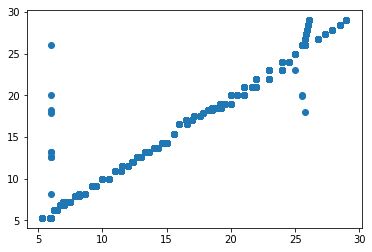

In [57]:
plt.scatter(test_y,rf_predictions)

In [58]:
rf_case_predictions = rf_case.predict(case_x)

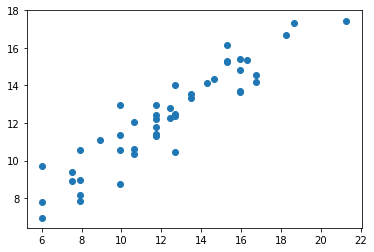

In [59]:
plt.scatter(case_y, rf_case_predictions)

# Grid Search for Hyperparameter Tuning

In [60]:
# Random Forest Regression Params
# n_estimators : [1, 10, 50, 100] This can be any value, but choosing these three for faster computation.
# max_depth : [1, 10, 20]  This can be any value, but choosing these three for faster computation.
# More params here : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
params = {"n_estimators" : [1, 10, 100], "max_depth" : [1, 10, 20]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  print(param)
#   result.append(cross_validate(RandomForestRegressor(*param),crossValidationSet, test_x, test_y))

{'max_depth': 1, 'n_estimators': 1}
{'max_depth': 1, 'n_estimators': 10}
{'max_depth': 1, 'n_estimators': 100}
{'max_depth': 10, 'n_estimators': 1}
{'max_depth': 10, 'n_estimators': 10}
{'max_depth': 10, 'n_estimators': 100}
{'max_depth': 20, 'n_estimators': 1}
{'max_depth': 20, 'n_estimators': 10}
{'max_depth': 20, 'n_estimators': 100}


# Neural Net - Multi Layer Perceptron

In [61]:
nn = MLPRegressor() # Init
# nn = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='lbfgs',alpha=0.001,batch_size='auto',
#               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
#               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
#               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
#               epsilon=1e-08)
nn.fit(train_x, train_y) # Train
nn_case = MLPRegressor()
nn_case.fit(case_x, case_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

# Multi Layer Perceptron Score and MSE. 
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [36]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Multi Layer Perceptron :", nn.score(train_x, train_y))

# MSE on validation set
print("Validation Set Score Multi Layer Perceptron :", nn.score(val_x, val_y))

# MSE on test set
print("Test Set Score Multi Layer Perceptron :", nn.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Multi Layer Perceptron :", mean_squared_error(train_y, nn.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Multi Layer Perceptron :", mean_squared_error(val_y, nn.predict(val_x)))

# MSE on test set
print("Test Set MSE Multi Layer Perceptron :", mean_squared_error(test_y, nn.predict(test_x)))

print("********************MAPE********************")
# MSE on training set
print("Training Set Score Multi Layer Perceptron :", nn.score(train_x, train_y))

# MSE on validation set
print("Validation Set Score Multi Layer Perceptron :", nn.score(val_x, val_y))

# MSE on test set
print("Test Set Score Multi Layer Perceptron :", nn.score(test_x, test_y))

# MSE on training set
print("Training Set MAPE Multi Layer Perceptron :", mape(train_y, nn.predict(train_x)))

# MSE on validation set
print("Validation Set MAPE Multi Layer Perceptron :", mape(val_y, nn.predict(val_x)))

# MSE on test set
print("Test Set MAPE Multi Layer Perceptron :", mape(test_y, nn.predict(test_x)))

print("********************Metrics for Case Data********************")
# R2 on case set
print("R2 Score Case Data NN:", nn_case.score(case_x, case_y ))
# MAPE on case set
print("Case Set MAPE NN:", mape(case_y, nn_case.predict(case_x)))

********************MSE********************
Training Set Score Multi Layer Perceptron : -4.696913906920841e-06
Validation Set Score Multi Layer Perceptron : -0.06929046201936728
Test Set Score Multi Layer Perceptron : -0.05160135672908761
Training Set MSE Multi Layer Perceptron : 19.0685580014375
Validation Set MSE Multi Layer Perceptron : 19.783632693959422
Test Set MSE Multi Layer Perceptron : 20.11814478353699
********************MAPE********************
Training Set Score Multi Layer Perceptron : -4.696913906920841e-06
Validation Set Score Multi Layer Perceptron : -0.06929046201936728
Test Set Score Multi Layer Perceptron : -0.05160135672908761
Training Set MAPE Multi Layer Perceptron : 30.28286383519381
Validation Set MAPE Multi Layer Perceptron : 36.87344078759925
Test Set MAPE Multi Layer Perceptron : 34.86606234091884
********************Metrics for Case Data********************
R2 Score Case Data RF: -295231059.9203078
Case Set MAPE RF: 500183.3851689119


In [27]:
nn_predictions = nn.predict(test_x)

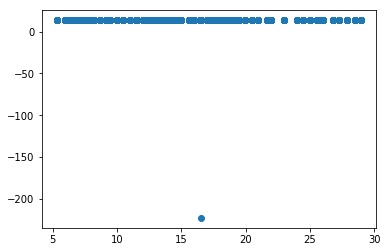

In [28]:
plt.scatter(test_y,nn_predictions)

In [29]:
nn_case_pred = nn_case.predict(case_x)

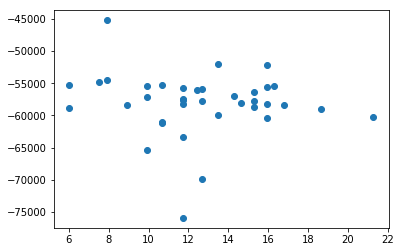

In [30]:
plt.scatter(case_y, nn_case_pred)